# Part I - (Dataset Exploration Title)
## by (Nnaji Maryann)

## Introduction
> For this analysis, I would be using the <b>Ford GoBike System Data</b> which is a data set containing information about the individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

> For this data, I will derive some insights using the features available. This will begin with exploring the data to note findings that might lead to insights.
  



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load dataset into a pandas dataframe and view the first five rows of data
bike = pd.read_csv('ford_go_bike.csv')
print(bike.shape)
bike.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#View the information of the data 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
#Checking for duplicates
bike.duplicated().sum()

0

In [5]:
#Checking for null values 
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#Check for unique values in the user_type column
bike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [7]:
#Check for unique values in the member_gender column
bike.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
#Check for unique values in the bike_share_for_all_trip column
bike.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

##### Some of the issues from the dataset include
- Wrong datatypes of some columns


- Presence of null/missing values

## Cleaning Process

#### Fill the nan values in the member gender column with 'Unknown'

In [9]:
#Make a copy of data
go_bike = bike.copy()

In [10]:
go_bike.member_gender.fillna('Unknown', inplace = True)

### Define
> Convert the start_time and end_time columns to datetime then derive the day, month, year and hour 

### Code

In [11]:
#Covert datatype using datetime()
#start_time
go_bike['start_time'] = pd.to_datetime(go_bike['start_time'])

#end_time
go_bike['end_time'] = pd.to_datetime(go_bike['end_time'])

In [12]:
#Confirm Changes
print(go_bike.start_time.dtype)
print(go_bike.end_time.dtype )

datetime64[ns]
datetime64[ns]


In [13]:
#Derive the hour, day, month and year from both columns and store them in new columns
#start_time
go_bike['start_hour'] = go_bike['start_time'].dt.hour
go_bike['start_day'] = go_bike['start_time'].dt.day_name()


#end_time
go_bike['end_hour'] = go_bike['end_time'].dt.hour
go_bike['end_day'] = go_bike['end_time'].dt.day_name()

In [14]:
#Confirm Changes 
go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,end_hour,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,8,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Unknown,No,18,Thursday,6,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,5,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday,4,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday,0,Friday


### Define
> Drop entries with missing values 

### Code

In [15]:
#Drop missing values 
go_bike.dropna(inplace = True)

In [16]:
#Confirm Changes 
go_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_hour                 0
start_day                  0
end_hour                   0
end_day                    0
dtype: int64

In [17]:
#Check the shape of the modified data
go_bike.shape

(174952, 20)

### Define 
> Drop unecessary columns

### Code

In [18]:
#Drop columns not needed
go_bike.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_longitude', 'end_station_latitude', 'member_birth_year', 'start_station_name', 'end_station_name'], axis = 1, inplace = True)

In [19]:
#Confirm Changes 
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_hour                 174952 non-null int64
start_day                  174952 non-null object
end_hour                   174952 non-null int64
end_day                    174952 non-null object
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 16.0+ MB


### Define
> Convert the hour columns and the bike_id to str 

### Code

In [20]:
#Converting the datatypes
#Start hour
go_bike['start_hour'] = go_bike.start_hour.astype(str)

#End hour
go_bike['end_hour'] = go_bike.end_hour.astype(str)

#Bike id
go_bike['bike_id'] = go_bike.bike_id.astype(str)

In [21]:
#Confirm changes
print(go_bike.start_hour.dtype)
print(go_bike.end_hour.dtype)
print(go_bike.bike_id.dtype)

object
object
object


In [22]:
#View cleaned data 
go_bike.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,start_hour,start_day,end_hour,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,Male,No,17,Thursday,8,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,Male,No,12,Thursday,5,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,Other,No,17,Thursday,4,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,Male,Yes,23,Thursday,0,Friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,Subscriber,Male,No,23,Thursday,0,Friday


### What is the structure of your dataset?

> The data contains 183412 rows and 16 columns. After cleaning and modifying the data it contains 174952 rows and 15 columns. It contains specifications on the duration of rides in seconds as well as other data including user type, member gender, latitudes and longitudes of the start and end locations.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out the duration and frequency of trips per day, per user type the most as well as the time of day that trips are taken and the effect of bike sharing on the duration and frequencty of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The 'duration_sec', 'start_hour', 'start_day', 'user_type', 'bike_share_for_all_trip' will be useful in this analysis.

## Univariate Exploration


### Question: Which day(s) of the week has the most bike rides?

### Visualisation

In [23]:
#Create function for bar chart
def bar(df,col, title,hue, orders):
    base_color = sb.color_palette()[4]
    plt.figure(figsize = (7,7))
    plt.title(f'{title}', fontsize = 15 )
    sb.countplot(data = df, x = col,hue = hue, color = base_color,order = orders)

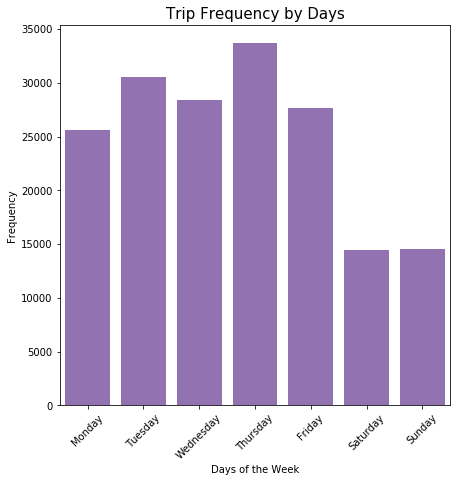

In [24]:
#Plot bar chart 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bar(go_bike,'start_day','Trip Frequency by Days',None, days)
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation = 45);

### Observation
>From this I can see that rides are mostly taken during the weekdays with Thursday having the highest number of bike rides and not much action on the weekends.

### Question: What time of the day are most trips taken?

### Visualisation

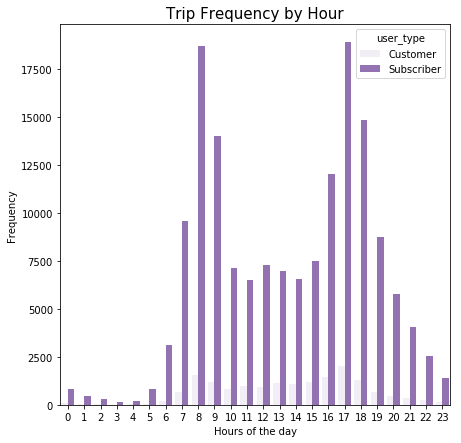

In [25]:
#Plot bar chart 
orders = ['0','1','2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
bar(go_bike,'start_hour', 'Trip Frequency by Hour','user_type', orders)
plt.xlabel('Hours of the day');
plt.ylabel('Frequency');

### Observation
> This chart shows us that most bike rides are mostly taken during the morning at 8am and 9am and during the evening between 4pm to 6pm. This may relate to resumption and closing hours of work for the users.

### Question : What time of the day are most trips taken for each day of the week?

### Visualisation

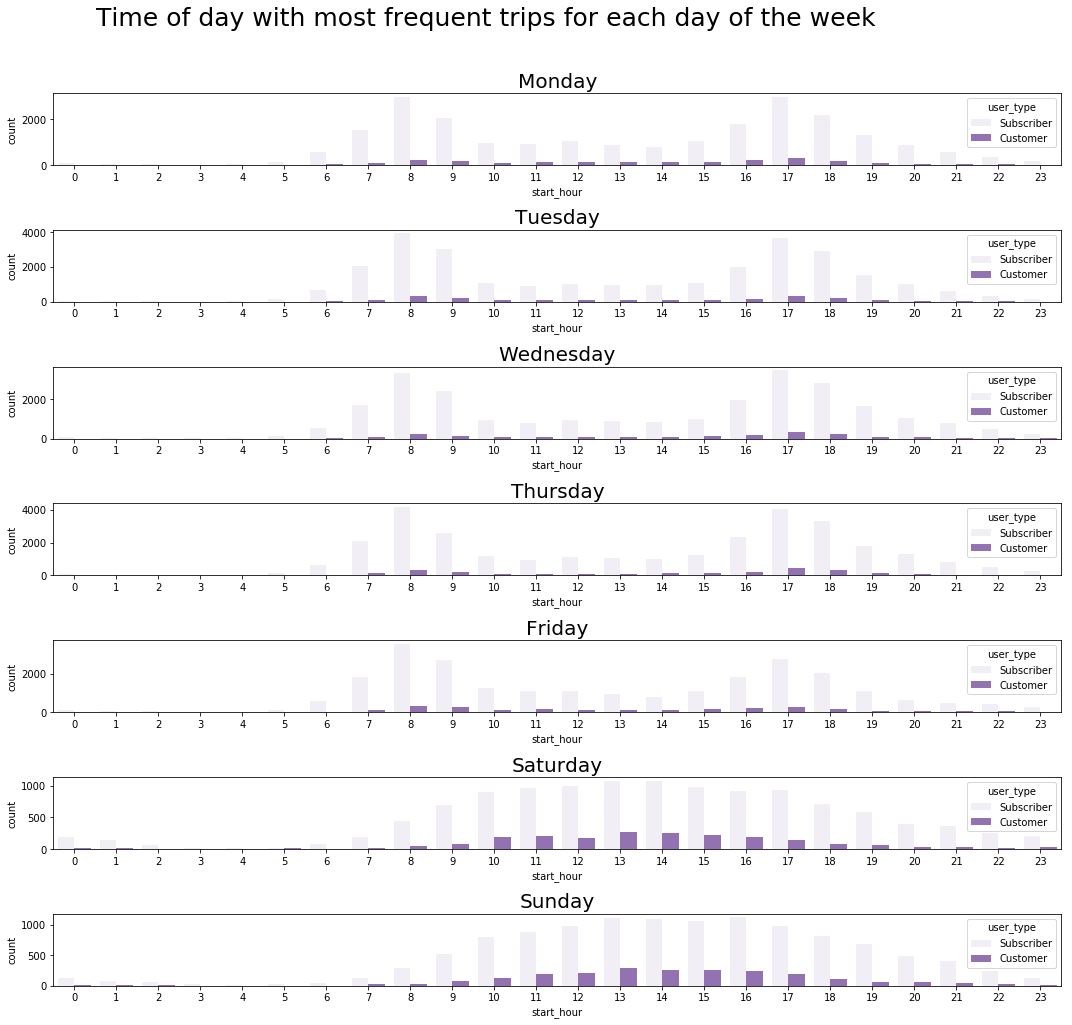

In [26]:
#Plot for each day of the week by querying the data and using subplots
hours =  ['0','1','2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
mon = go_bike.query("start_day == 'Monday'")
tues = go_bike.query("start_day == 'Tuesday'")
wed = go_bike.query("start_day == 'Wednesday'")
thurs = go_bike.query("start_day == 'Thursday'")
fri = go_bike.query("start_day == 'Friday'")
sat = go_bike.query("start_day == 'Saturday'")
sun = go_bike.query("start_day == 'Sunday'")
fig, ax = plt.subplots(nrows = 7, figsize = (20,20))
fig.suptitle('Time of day with most frequent trips for each day of the week', fontsize = 25)
sb.countplot(data = mon, x = 'start_hour', hue = 'user_type', hue_order = ['Subscriber','Customer'], order = hours, ax = ax[0], color = sb.color_palette()[4])
ax[0].set_title('Monday', fontsize = 20)
sb.countplot(data = tues, x = 'start_hour',hue = 'user_type', hue_order = ['Subscriber','Customer'],order = hours, ax = ax[1], color = sb.color_palette()[4])
ax[1].set_title('Tuesday', fontsize = 20)
sb.countplot(data = wed, x = 'start_hour', hue = 'user_type',hue_order = ['Subscriber','Customer'],order = hours, ax = ax[2], color = sb.color_palette()[4])
ax[2].set_title('Wednesday', fontsize = 20)
sb.countplot(data = thurs, x = 'start_hour',hue = 'user_type',hue_order = ['Subscriber','Customer'], order = hours, ax = ax[3], color = sb.color_palette()[4])
ax[3].set_title('Thursday', fontsize = 20)
sb.countplot(data = fri, x = 'start_hour',hue = 'user_type',hue_order = ['Subscriber','Customer'], order = hours, ax = ax[4], color = sb.color_palette()[4])
ax[4].set_title('Friday', fontsize = 20)
sb.countplot(data = sat, x = 'start_hour',hue = 'user_type',hue_order = ['Subscriber','Customer'], order = hours, ax = ax[5], color = sb.color_palette()[4])
ax[5].set_title('Saturday', fontsize = 20)
sb.countplot(data = sun, x = 'start_hour',hue = 'user_type',hue_order = ['Subscriber','Customer'], order = hours, ax = ax[6], color = sb.color_palette()[4])
ax[6].set_title('Sunday', fontsize = 20)
plt.subplots_adjust(left=0.2,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.4, 
                    hspace=0.9)
plt.show()

### Observation
> We can deduce from this that on weekdays there are most frequent trips at 5pm and 6pm but on Saturdays more trips are taken by 1pm and 2pm and on Sundays more trips are taken by 1pm and 4pm 

### Question: Which user takes frequent rides?

### Visualisation

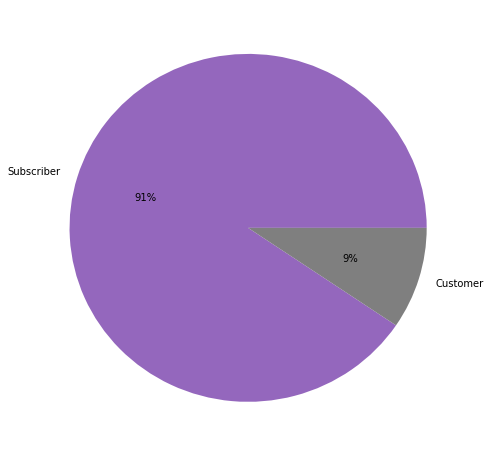

In [27]:
#Plotting a pie chart of the user types
usr_type = go_bike.user_type.value_counts()
plt.figure(figsize = (8,8))
plt.pie(usr_type, labels = usr_type.index,autopct='%0.0f%%', colors = [sb.color_palette()[4],sb.color_palette()[7]]);

### Observation
There are more subscribers than customers

### Question: Which gender makes use of this service the most?

### Visualisation

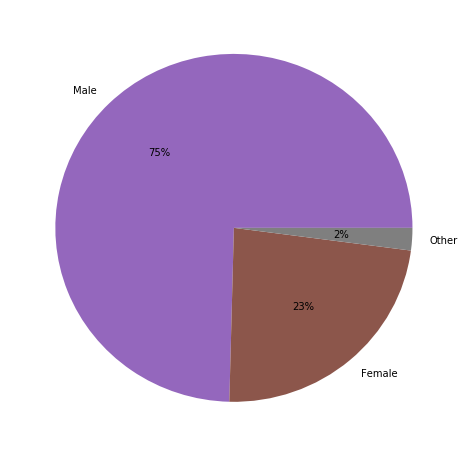

In [28]:
#Plotting a pie chart of the member gender
usr_type = go_bike.member_gender.value_counts()
plt.figure(figsize = (8,8))
plt.pie(usr_type, labels = usr_type.index,autopct='%0.0f%%', colors = [sb.color_palette()[4],sb.color_palette()[5],sb.color_palette()[7]]);

### Observation
Males make use of this service the most followed by females than users of other genders

## Bivariate Exploration

### Question: Which gender takes the longest rides?

### Visualisation

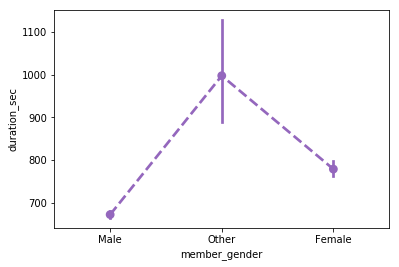

In [29]:
sb.pointplot(x = 'member_gender', y = 'duration_sec', data = go_bike, linestyles = "--", color = sb.color_palette()[4]);

###  Observation
Users of other genders take longer trips than the male and the female users

### Question: What is the average duration of Trips per day?

In [30]:
q = go_bike['duration_sec'].quantile(0.97)
q

1905.0

### Visualisation

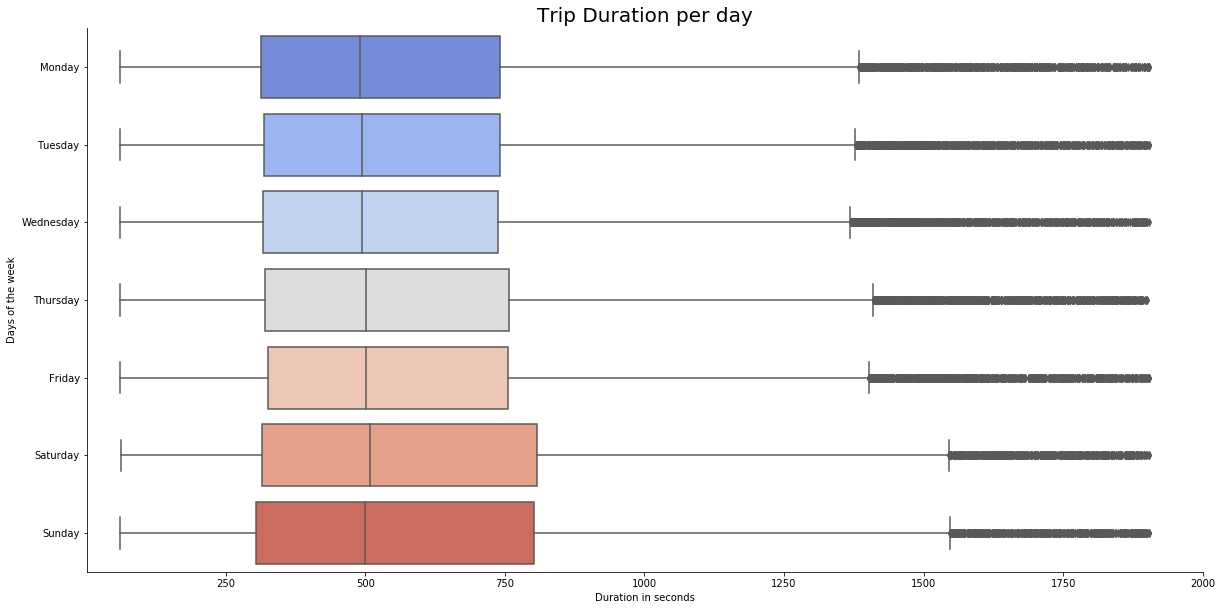

In [31]:
#Plot the duration of trips by day 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bx = plt.figure(figsize = (20,10))
filtered = go_bike.query(f'duration_sec < {q}')
bx = sb.boxplot(x = 'duration_sec' , y = 'start_day', data = filtered, palette = 'coolwarm', order = days);
bx.set_xlim(1,2000)
bx = plt.xlabel('Duration in seconds', fontsize = 10)
bx = plt.ylabel('Days of the week', fontsize = 10)
bx = sb.despine()
bx = plt.title('Trip Duration per day', fontsize = 20);

### Observation
>It is observed that the total average duration of trips per day lies at 500 seconds. Also, users take longer rides during the weekend compared to weekdays.

### Question: Which user takes longer rides?

### Visualisation

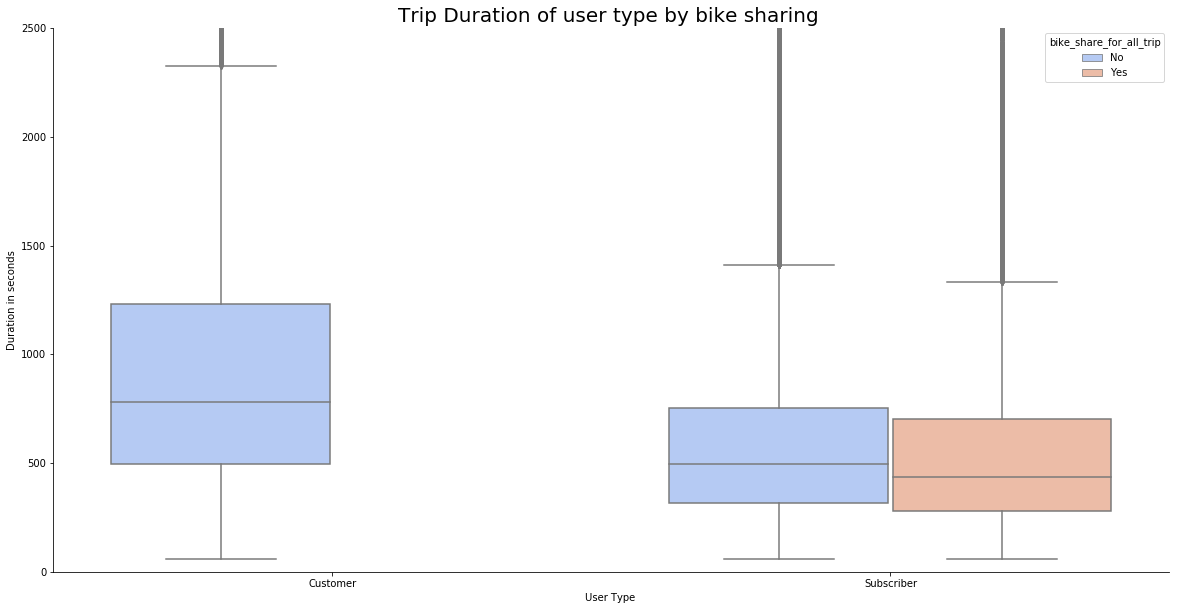

In [32]:
#Plot the duration of trips by user type 
ax = plt.figure(figsize = (20,10))
ax = sb.boxplot(x = 'user_type' , y = 'duration_sec', hue = 'bike_share_for_all_trip', data = go_bike, palette = 'coolwarm');
ax.set_ylim(1, 2500)
ax = plt.xlabel('User Type ', fontsize = 10)
ax = plt.ylabel('Duration in seconds', fontsize = 10)
ax = sb.despine()
ax = plt.title('Trip Duration of user type by bike sharing ', fontsize = 20);

### Observation
>Customers take longer trips in general than subscribers. However, subscribers without bike sharing take longer trips than those without

In [33]:
#Getting the average trip duration
go_bike.duration_sec.mean()

704.0027436096758

In [34]:
#Getting the average trip duration for the user type
trip_usr_avg = go_bike[['duration_sec', 'user_type']].groupby('user_type').agg({'duration_sec':'mean'})
trip_usr_avg

,duration_sec
user_type,
Customer,1310.656103
Subscriber,640.551305


### Question: For each day of the week, which users take more trips?

### Visualisation

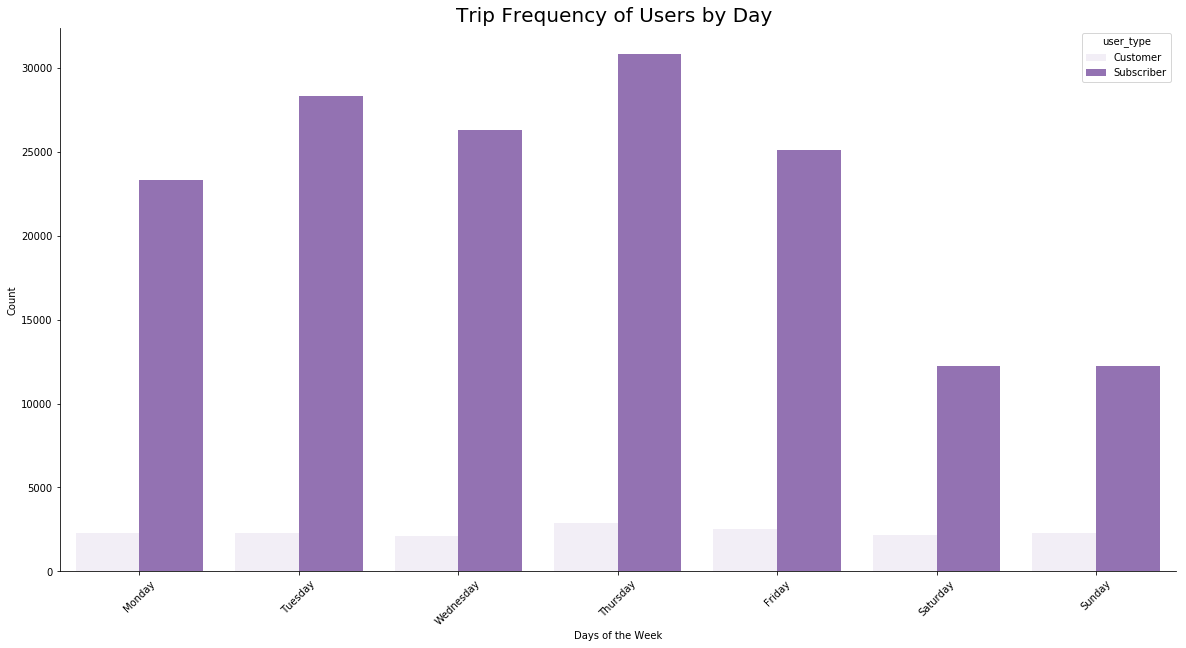

In [35]:
#### Plot the frequency of user types for each day 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cx = plt.figure(figsize = (20,10))
cx = sb.countplot(x = 'start_day', hue = 'user_type', data = go_bike, order = days, color = sb.color_palette()[4]);
cx = sb.despine()
cx = plt.xticks(rotation = 45)
cx = plt.title('Trip Frequency of Users by Day ', fontsize = 20);
cx = plt.xlabel('Days of the Week', fontsize = 10)
cx = plt.ylabel('Count', fontsize = 10)

### Observation
>From this chart, we can deduce that subscribers take more trips than customers for each day of the week.

### Question: What is the bike share trip status per the user type?

### Visualisation

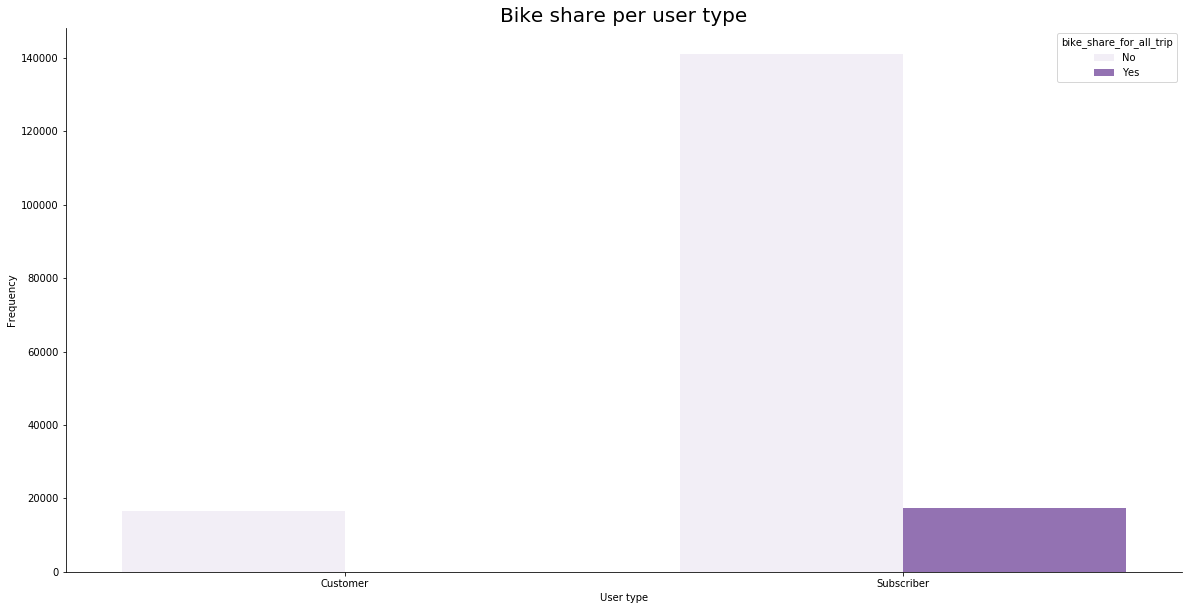

In [36]:
#Plotting the bike share trip per user type
dx = plt.figure(figsize = (20,10))
dx = sb.countplot(x = 'user_type', hue = 'bike_share_for_all_trip', data = go_bike, color = sb.color_palette()[4]);
dx = sb.despine()
dx = plt.title('Bike share per user type', fontsize = 20)
dx = plt.xlabel('User type', fontsize = 10)
dx = plt.ylabel('Frequency', fontsize = 10)

### Observation
> We can conclude from this visual that bike sharing is only available to subscribers and even though a large portion of subscribers don't have bike sharing priviledge, they take more trips than customers.

### Question: For each day of the week which user type takes longer trips?

### Visualisation

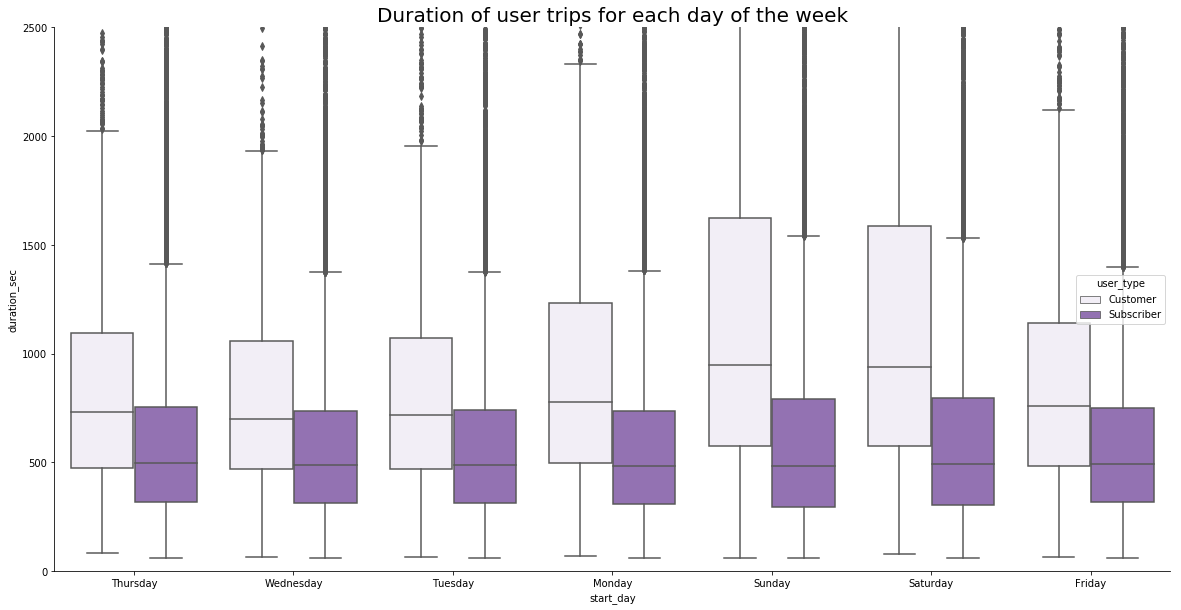

In [37]:
#Plotting the duration of trips by users for each day of the week
dx = plt.figure(figsize = (20,10))
dx = sb.boxplot(x = 'start_day',y = 'duration_sec', hue = 'user_type', data = go_bike, color = sb.color_palette()[4]);
dx.set_ylim(1,2500)
dx = sb.despine()
dx = plt.title('Duration of user trips for each day of the week', fontsize = 20)

### Observation
>The average duration of trips for customers is higher than the average duration of trips by subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For this dataset, I noticed that there were more trips taken by Subscribers but they were of a shorter duration than Customers who didn't take as much trips as the Subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that most subscribers did not have access to bike sharing but it did not affect the number of trips taken by the Subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question: What is the trip duration of users by hour?

### Visualisation

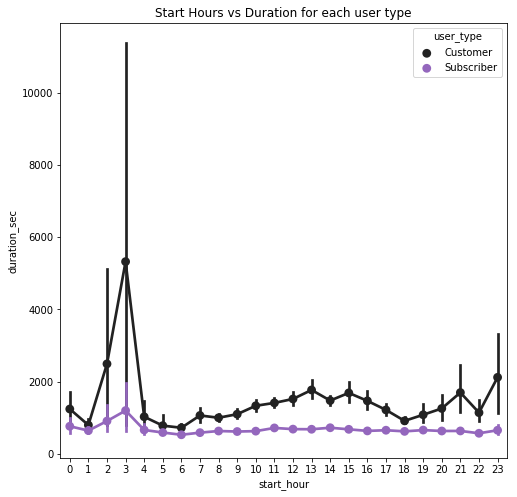

In [38]:
hours =  ['0','1','2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
plt.figure(figsize = (8,8))
point = sb.pointplot(x = go_bike['start_hour'], y = go_bike['duration_sec'], hue = go_bike['user_type'], order = hours,color = sb.color_palette()[4])
plt.title('Start Hours vs Duration for each user type');

We can see from this plot that customers take their longest trips during the early morning hours

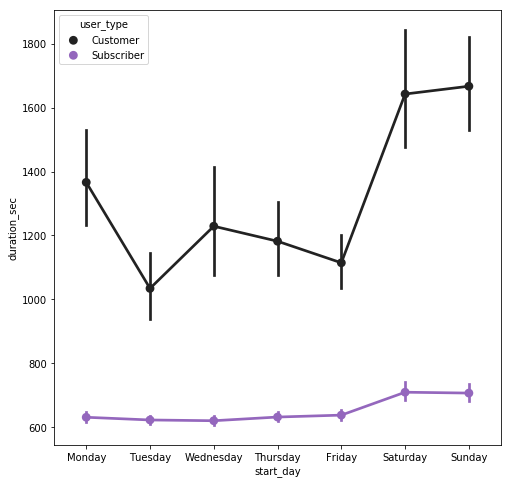

In [39]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (8,8))
sb.pointplot(x = go_bike['start_day'], y = go_bike['duration_sec'], hue = go_bike['user_type'], order = days, color = sb.color_palette()[4]);

Customers take longer trips than Subscribers during the week

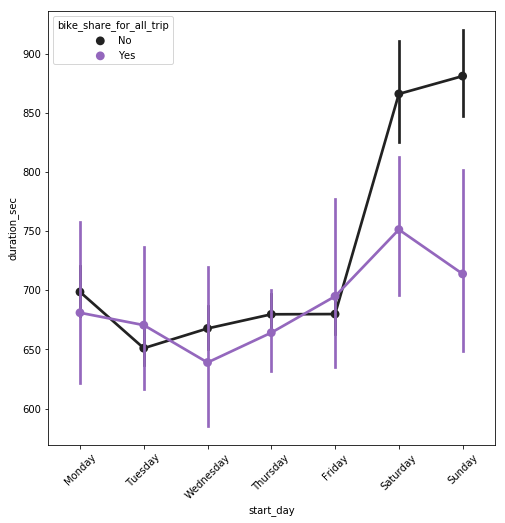

In [40]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize= (8,8))
plt.xticks(rotation = 45)
sb.pointplot(x = go_bike['start_day'], y = go_bike['duration_sec'], hue = go_bike['bike_share_for_all_trip'], order = days,color = sb.color_palette()[4]);

Users without access to bike sharing take longer trips during the weekends  

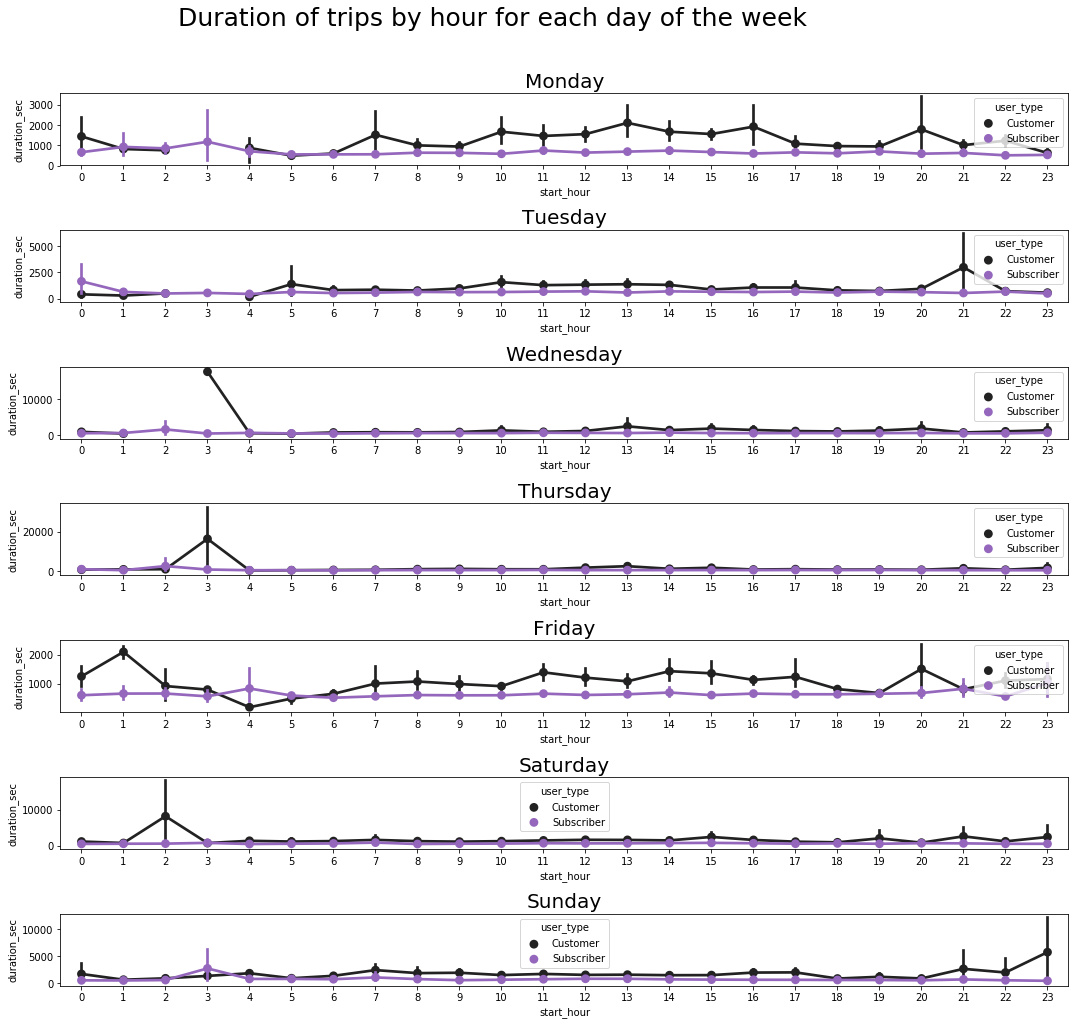

In [41]:
#Plot for each day of the week by querying the data and using subplots
hours =  ['0','1','2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
mon = go_bike.query("start_day == 'Monday'")
tues = go_bike.query("start_day == 'Tuesday'")
wed = go_bike.query("start_day == 'Wednesday'")
thurs = go_bike.query("start_day == 'Thursday'")
fri = go_bike.query("start_day == 'Friday'")
sat = go_bike.query("start_day == 'Saturday'")
sun = go_bike.query("start_day == 'Sunday'")
fig, ax = plt.subplots(nrows = 7, figsize = (20,20))
fig.suptitle('Duration of trips by hour for each day of the week', fontsize = 25)
sb.pointplot(data = mon, x = 'start_hour', y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[0], color = sb.color_palette()[4])
ax[0].set_title('Monday', fontsize = 20)
sb.pointplot(data = tues, x = 'start_hour',y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[1], color = sb.color_palette()[4])
ax[1].set_title('Tuesday', fontsize = 20)
sb.pointplot(data = wed, x = 'start_hour',y = 'duration_sec', hue ='user_type', hue_order = ['Customer', 'Subscriber'],order = hours, ax = ax[2], color = sb.color_palette()[4])
ax[2].set_title('Wednesday', fontsize = 20)
sb.pointplot(data = thurs, x = 'start_hour',y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[3], color = sb.color_palette()[4])
ax[3].set_title('Thursday', fontsize = 20)
sb.pointplot(data = fri, x = 'start_hour',y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[4], color = sb.color_palette()[4])
ax[4].set_title('Friday', fontsize = 20)
sb.pointplot(data = sat, x = 'start_hour',y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[5], color = sb.color_palette()[4])
ax[5].set_title('Saturday', fontsize = 20)
sb.pointplot(data = sun, x = 'start_hour',y = 'duration_sec', hue ='user_type',hue_order = ['Customer', 'Subscriber'], order = hours, ax = ax[6], color = sb.color_palette()[4])
ax[6].set_title('Sunday', fontsize = 20)
plt.subplots_adjust(left=0.2,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.4, 
                    hspace=0.9)
plt.show()

From this plot we can see that the duration of user rides each hour are within close range.However, on Mondays and Fridays there is a significance between the customer and subscriber duration and there are some hours where some customers didn't take trips at all.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The subscribers shorter duration of rides are consistent with Monday through Friday especially during rush hours, which can be said to be as a result of the service being used for commuting to work by the subscribers. It is also noticed that the bike sharing system allows users a more flexible use as seen in the contrast between customers and subscribes.

### Were there any interesting or surprising interactions between features?

> There were no suprising interactions between the features. They supplemented each other and made sense when looked at in combination with each other. Although some users patronized the service more frequently, it did not relate to how long they made use of the service. We can see this in the case of customers and subscribers as well as the comparison between the member genders.

## Conclusions
>My main findings during this exploration, were of the customers and the subscribers usage of this service. Customers took longer trips than subscribers in general and subscribers without bike sharing took longer trips than those with bike sharing. However, subscribers took more frequent trips in general both per hour and per day of the week possibly due to work commuting. 